In [3]:
# !wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

Hola, qué tal?

In [18]:
import numpy

In [19]:
!head land_global_temperature_annomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [21]:
T_Lan = numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv',delimiter=',',skiprows=4)

In [22]:
print(T_Lan)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [23]:
T_Lan.shape

(1632, 2)

In [26]:
from matplotlib import pyplot
%matplotlib inline

In [27]:
T_Lan[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [34]:
T_Lan[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

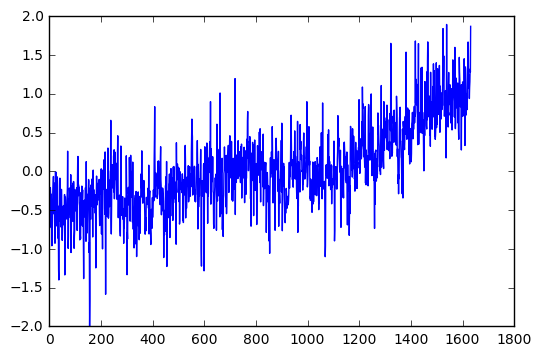

In [38]:
# You can delet the uglu line by adding ';' at the end of the plot command
pyplot.plot(T_Lan[:,1]);

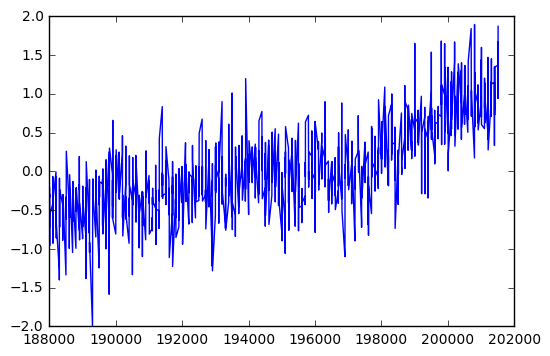

In [40]:
pyplot.plot(T_Lan[:,0],T_Lan[:,1]);

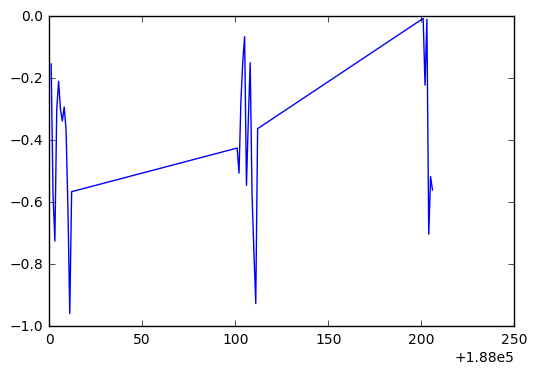

In [41]:
pyplot.plot(T_Lan[0:30,0],T_Lan[0:30,1]);

## Using numpy.arrange() for creating our date array

In [45]:
date = numpy.arange('1880','2016',dtype=('datetime64[M]'))

In [46]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [53]:
dummy = numpy.linspace(1,1632,1632)

print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


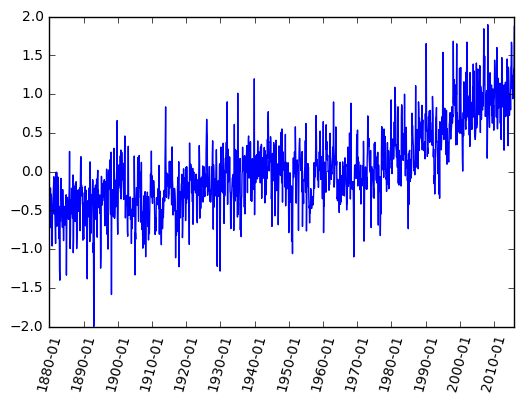

In [60]:
# too many labels in the x axis.
#pyplot.xticks(dummy,date rotation=75);

pyplot.xticks(dummy[::12*10],date[::12*10], rotation=75);

pyplot.plot(dummy,T_Lan[:,1]);

In [63]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

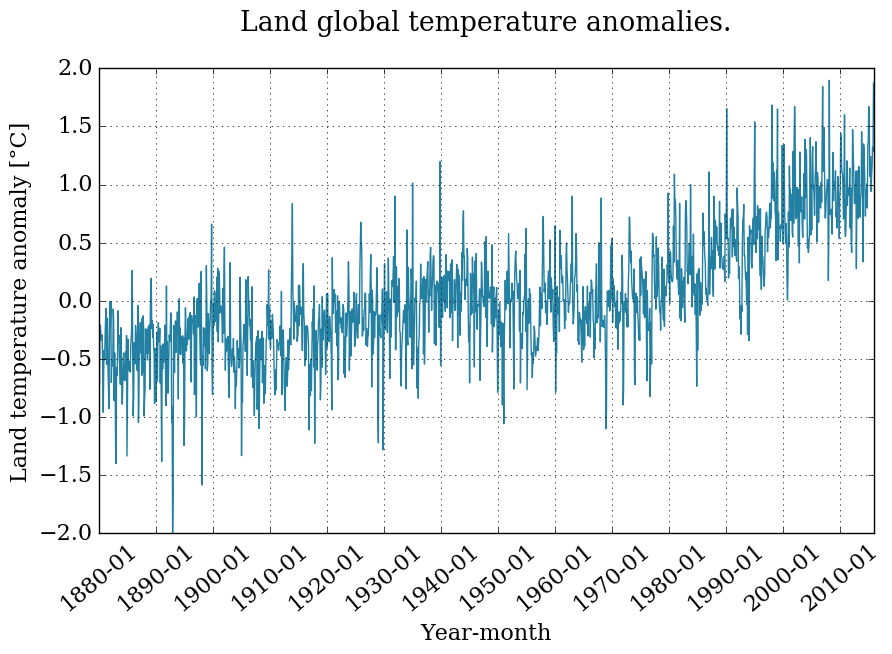

In [105]:
pyplot.figure(figsize=(10,6))

pyplot.xticks(dummy[::12*10],date[::12*10], rotation=40)

pyplot.plot(dummy, T_Lan[:,1], color='#2380a3' , linestyle='-', linewidth =1)

pyplot.title('Land global temperature anomalies.\n')

pyplot.xlabel('Year-month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

# CHECK why it is croping the plot.
# pyplot.savefig('temp_anomalies.png')

# Histograms

## Default

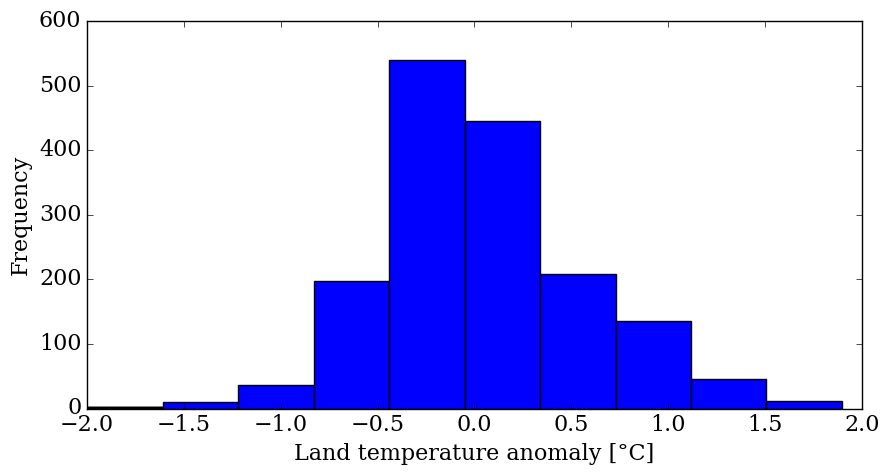

In [107]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_Lan[:,1])

pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

## Improved Histogram

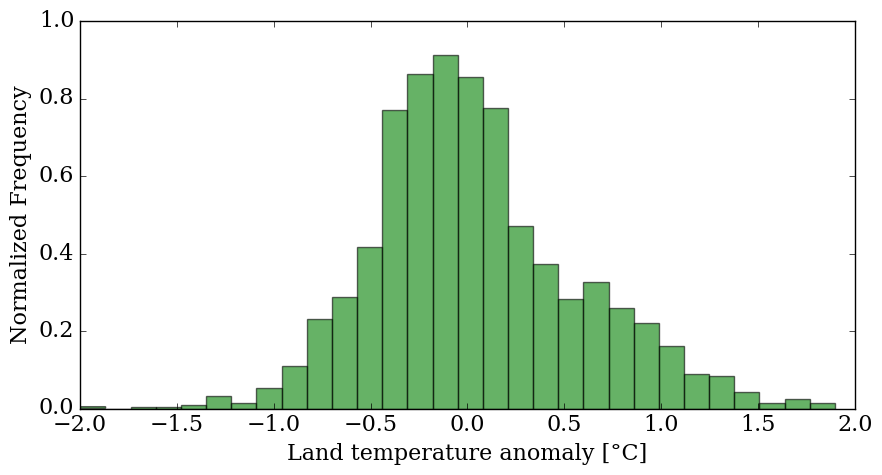

In [143]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_Lan[:,1], bins=30, normed = True, color='g', alpha=0.6)

pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized Frequency');

# Statistics

## Basic Statistics

In [138]:
mean_T = numpy.mean(T_Lan[:,1])

median_T = numpy.median(T_Lan[:,1])

print('The mean value is {:.5}\nThe median value is {:.5}'.format(mean_T,median_T))

The mean value is 0.04031
The median value is -0.0276


In [137]:
variance_T = numpy.var(T_Lan[:,1])
sigma_T = numpy.sqrt(variance_T)

print('The variance is {:.5}'.format(variance_T))
print('The standard deviation is {:.5}'.format(sigma_T))

The variance is 0.28041
The standard deviation is 0.52954


In [139]:
from scipy import stats

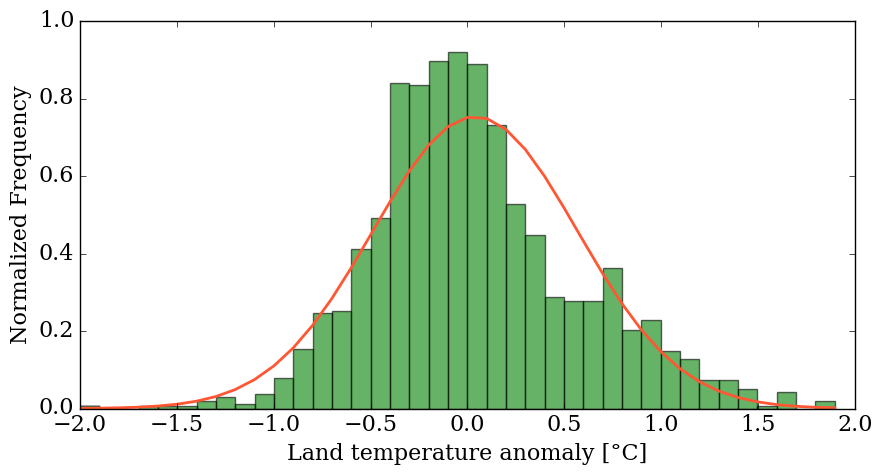

In [148]:
bins = numpy.linspace(min(T_Lan[:,1]),max(T_Lan[:,1]),40)

pyplot.figure(figsize=(10,5))

pyplot.hist(T_Lan[:,1], bins, normed = True, color='g', alpha=0.6)

#Plot the probability densitty function
pyplot.plot(bins, stats.norm.pdf(bins,mean_T,sigma_T), color='#ff5733', ls='-',lw=2)

pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized Frequency');

# Two plots in the same Figure

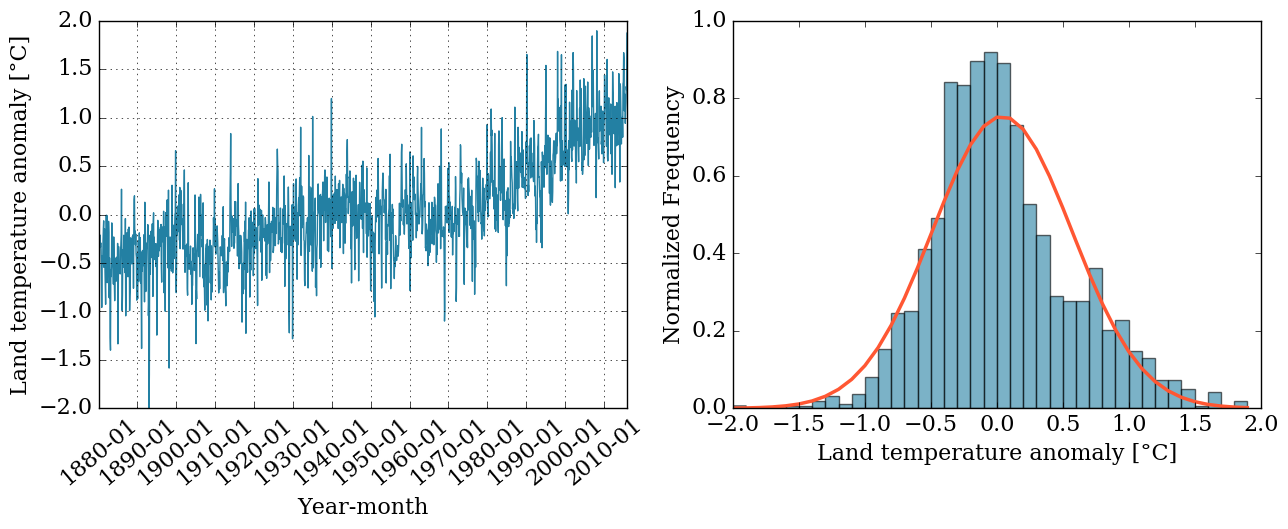

In [161]:
pyplot.figure(figsize=(15,5))

#First Plot
pyplot.subplot(121)
pyplot.xticks(dummy[::12*10],date[::12*10], rotation=40)
pyplot.plot(dummy, T_Lan[:,1], color='#2380a3' , linestyle='-', linewidth =1,alpha=1)
#pyplot.title('Land global temperature anomalies.\n')
pyplot.xlabel('Year-month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

#Second Plot
pyplot.subplot(122)
bins = numpy.linspace(min(T_Lan[:,1]),max(T_Lan[:,1]),40)
pyplot.hist(T_Lan[:,1], bins, normed = True, color='#2380a3', alpha=0.6,histtype='bar') #histtype: bar & stepfilled
#Plot the probability densitty function
pyplot.plot(bins, stats.norm.pdf(bins,mean_T,sigma_T), color='#ff5733', ls='-',lw=2.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized Frequency');

# Smooth the data

## Smooth Function

In [162]:
def smooth_data(N,data):
    """
    Returns smoothed data using a sliding_moving average
    
    Arguments:
    ----------
    N        (int): Amount of data values that will be averaged
    data   (array): Array of data we want to smooth.
    
    
    Returns:
    --------
    smooth (array): array with smothed data.
    """
    
    window = numpy.ones(N)/N
    smooth = numpy.convolve(data,window,'same')
    
    return smooth
    

In [164]:
# To check what a function does apply "?<function name>"

?smooth_data

In [169]:
smooth = smooth_data(12,T_Lan[:,1])

In [170]:
print(smooth)

[-0.18874167 -0.21688333 -0.24125833 ...,  0.93280833  0.843575    0.7415    ]


## Averaged Plot

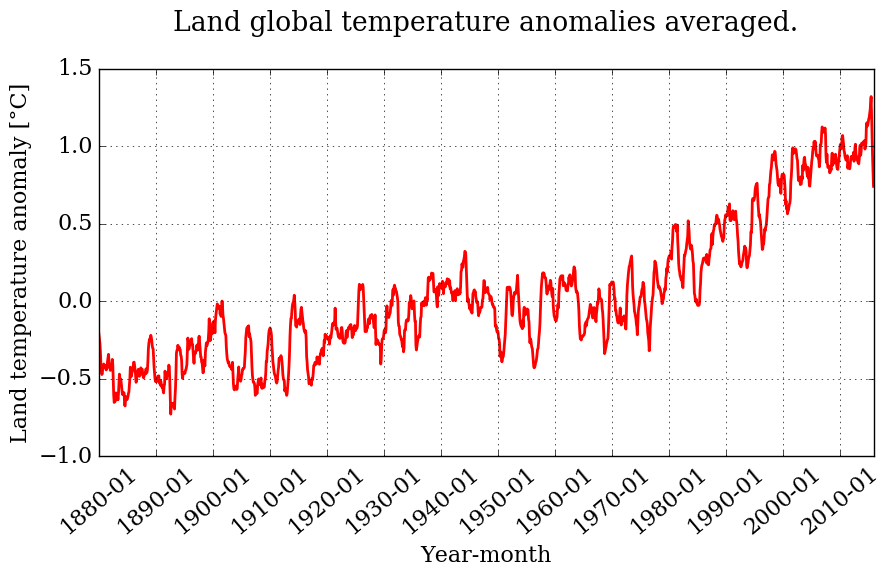

In [189]:
pyplot.figure(figsize=(10,5))

pyplot.xticks(dummy[::12*10],date[::12*10], rotation=40)

pyplot.plot(dummy, smooth, color='r' , linestyle='-', linewidth =2,alpha=1)

pyplot.title('Land global temperature anomalies averaged.\n')

pyplot.xlabel('Year-month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

## Non-Averaged and Averaged Data

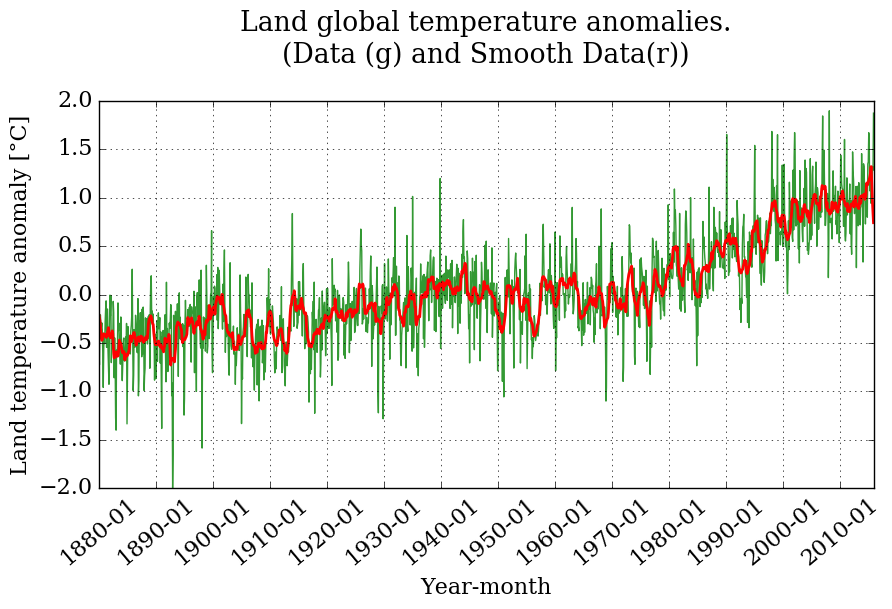

In [192]:
pyplot.figure(figsize=(10,5))

pyplot.xticks(dummy[::12*10],date[::12*10], rotation=40)

pyplot.plot(dummy, T_Lan[:,1], color='g' , linestyle='-', linewidth =1, alpha=0.8)
pyplot.plot(dummy, smooth, color='r' , linestyle='-', linewidth =2,alpha=1)

pyplot.title('Land global temperature anomalies.\n(Data (g) and Smooth Data(r))\n')

pyplot.xlabel('Year-month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

# Linear regression (the easy way)

## Function

In [194]:
m,b = numpy.polyfit(dummy,T_Lan[:,1],1)
print (m,b)

0.000832212749511 -0.639191783505


In [196]:
f_linear = numpy.poly1d((m,b))
print(f_linear)

 
0.0008322 x - 0.6392


## Plot of linear function

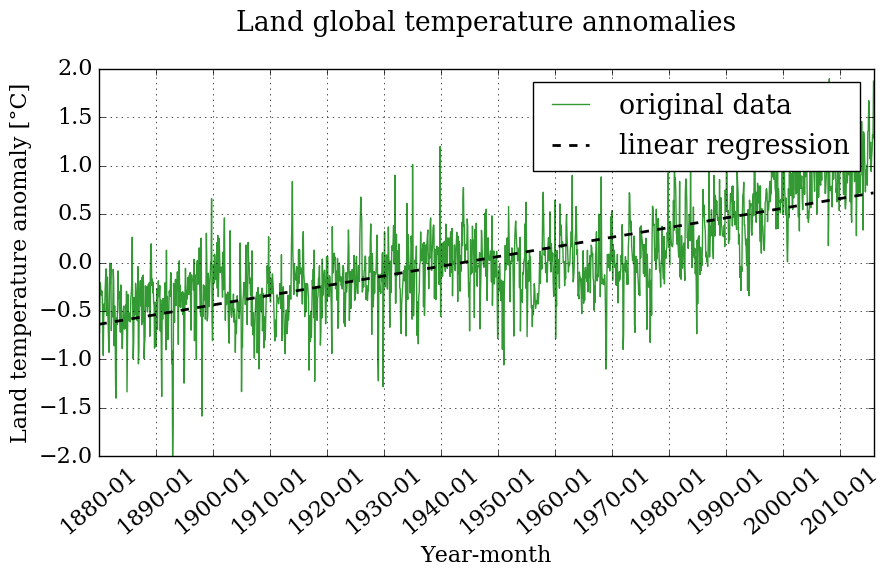

In [201]:
pyplot.figure(figsize=(10,5))

pyplot.xticks(dummy[::12*10],date[::12*10], rotation=40)

#Original Data series
pyplot.plot(dummy, T_Lan[:,1], color='g' , linestyle='-', linewidth =1, alpha=0.8, label='original data')

#Linear Regression
pyplot.plot(dummy,f_linear(dummy), color='k', ls='--', linewidth=2, label='linear regression')


#Averagedfunction
#pyplot.plot(dummy, smooth, color='r' , linestyle='-', linewidth =2,alpha=1)

pyplot.title('Land global temperature annomalies\n')

pyplot.xlabel('Year-month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend()
pyplot.grid()